<a href="https://colab.research.google.com/github/Rakesh4538/Bajajbackend/blob/main/21BDS0255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (856, 18)

Column Names:
 Index(['rownames', 'age', 'work', 'study', 'econhs', 'colgpa', 'hsgpa',
       'acteng', 'actmth', 'act', 'mathscr', 'male', 'calculus', 'attexc',
       'attgood', 'fathcoll', 'mothcoll', 'score'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  856 non-null    int64  
 1   age       856 non-null    int64  
 2   work      856 non-null    float64
 3   study     856 non-null    float64
 4   econhs    856 non-null    int64  
 5   colgpa    856 non-null    float64
 6   hsgpa     856 non-null    float64
 7   acteng    814 non-null    float64
 8   actmth    814 non-null    float64
 9   act       814 non-null    float64
 10  mathscr   856 non-null    int64  
 11  male      856 non-null    int64  
 12  calculus  856 non-null    int64  
 13  attexc    856 non-null    in

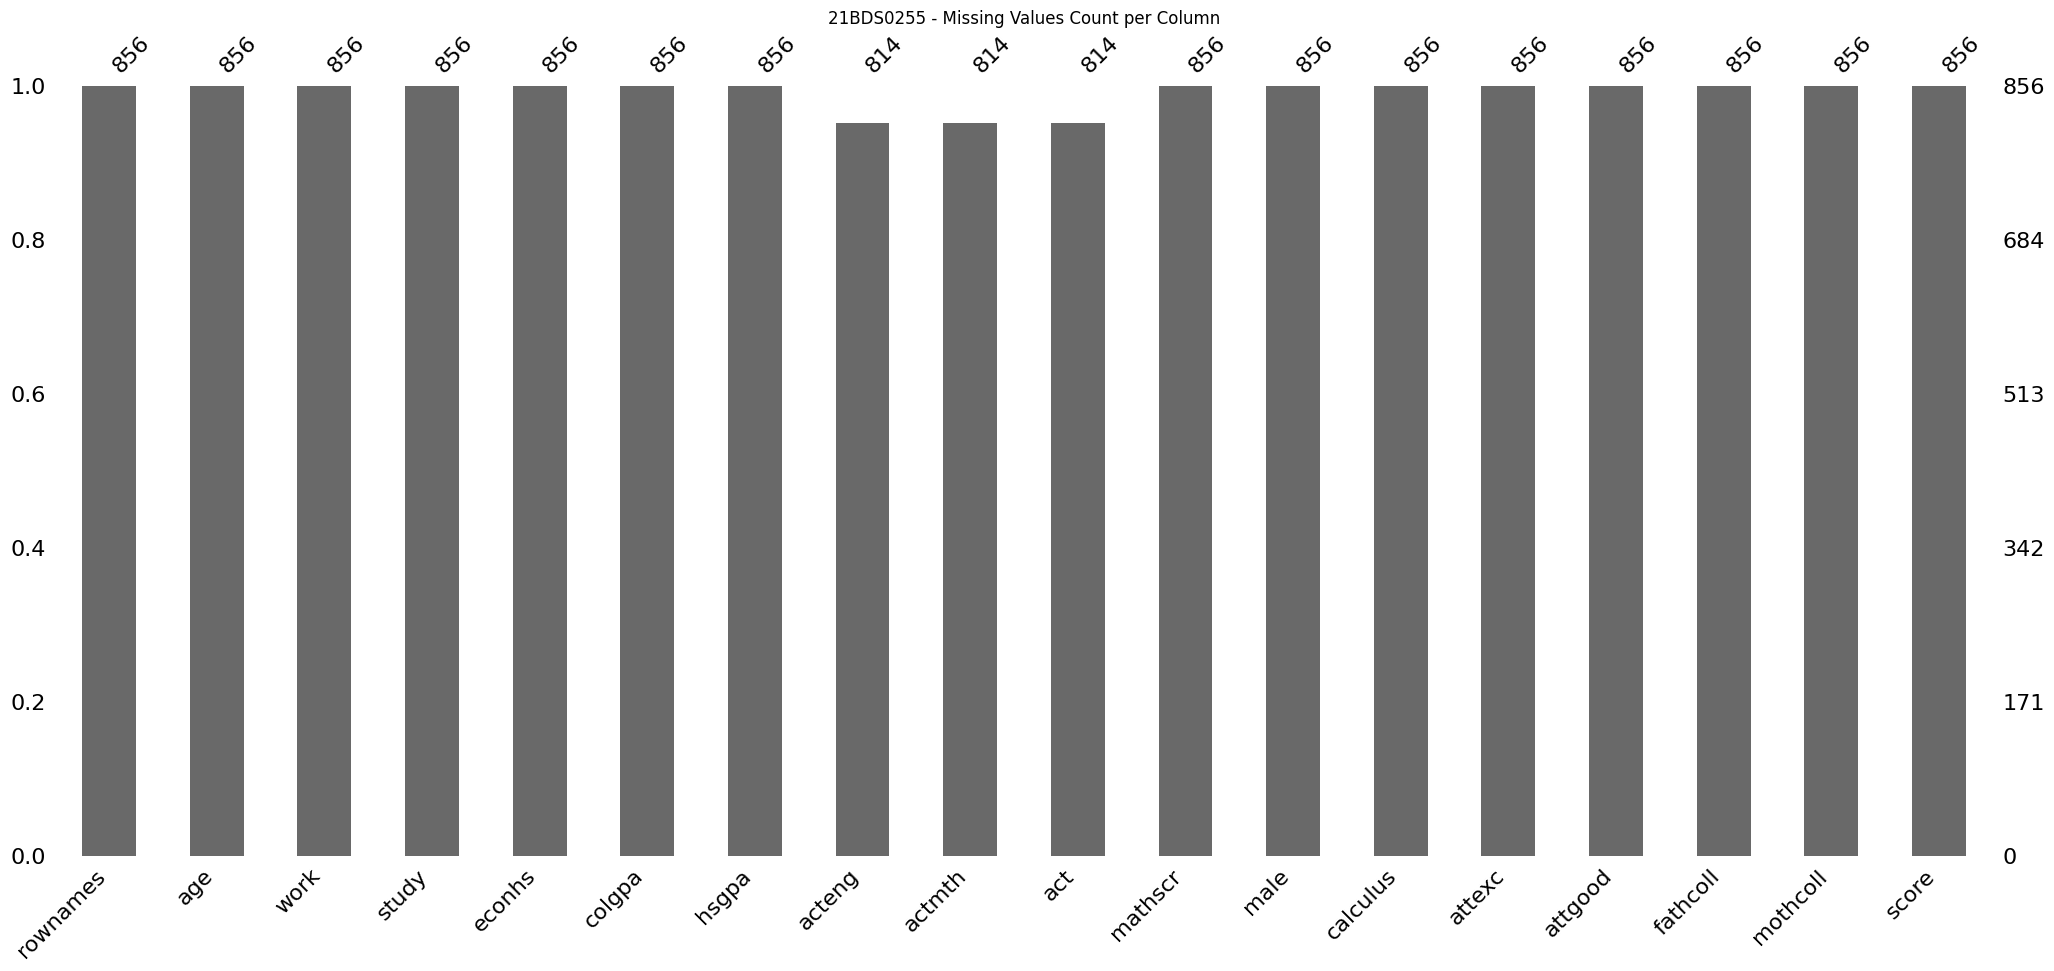

Numeric and Non-Numeric Value Counts in 'score' Column:
 score
False    856
Name: count, dtype: int64


<ipython-input-14-9982c6630806>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned["acteng"].fillna(data_cleaned["acteng"].mean(), inplace=True)
<ipython-input-14-9982c6630806>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

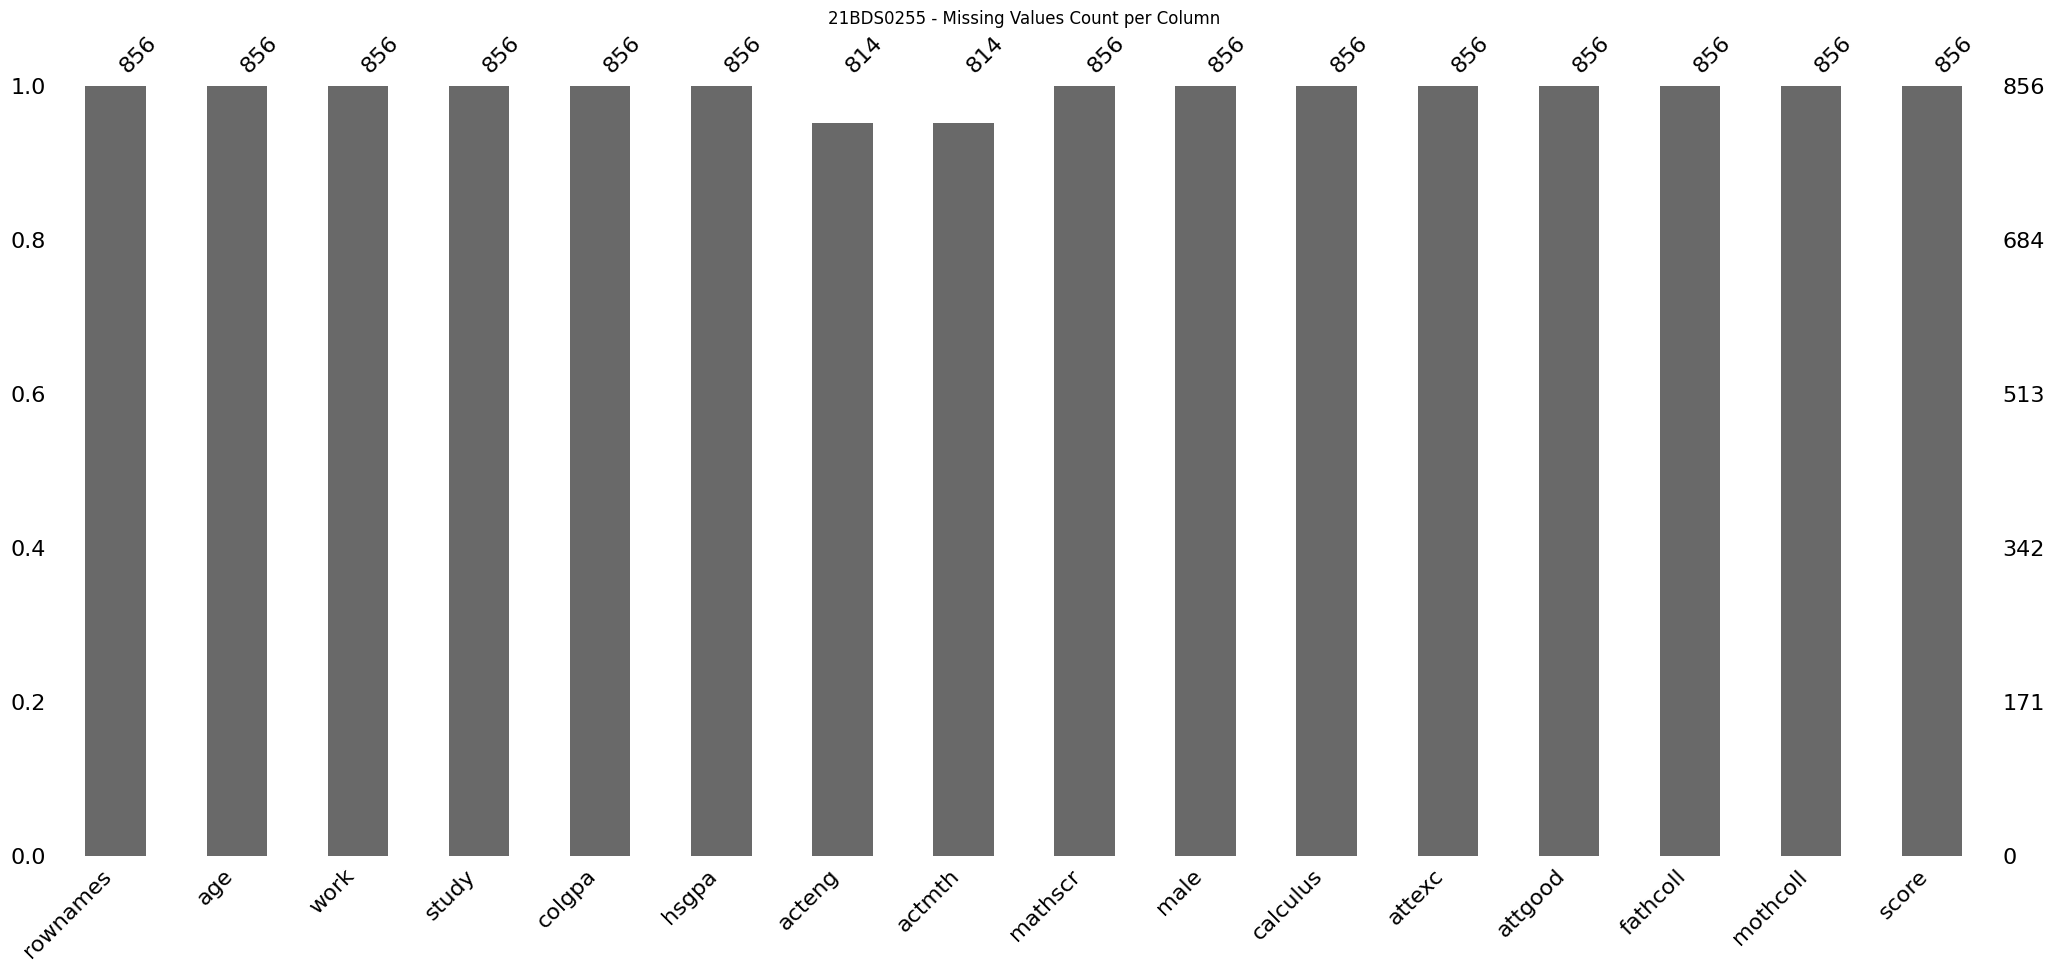


Mean of study column: 13.917990654205607
Median of study column: 12.0
Mode of study column: 10.0
Standard Deviation of study column: 7.804398440759843
Variance of study column: 60.90863502213467
Quantiles of study column:
 0.25     8.5
0.50    12.0
0.75    18.0
Name: study, dtype: float64
Interquartile Range (IQR) of study column: 9.5

Correlation between age and score:
             age     score
age    1.000000 -0.068885
score -0.068885  1.000000


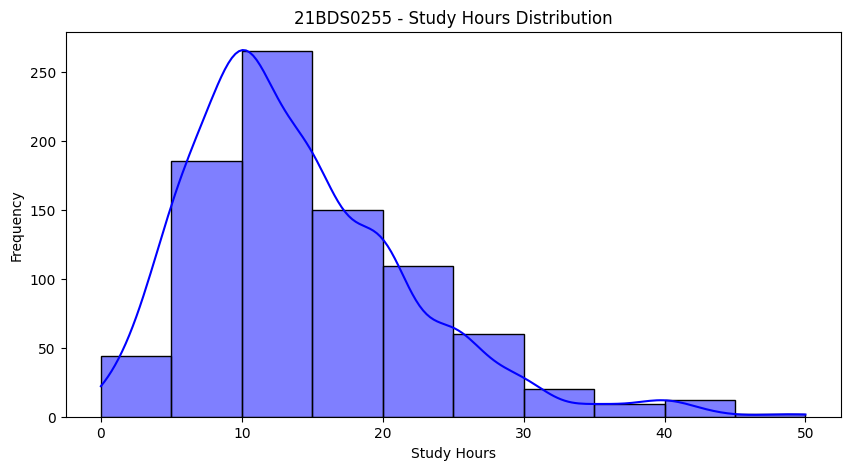

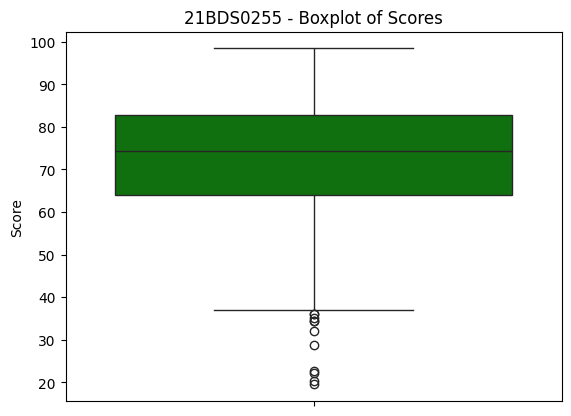

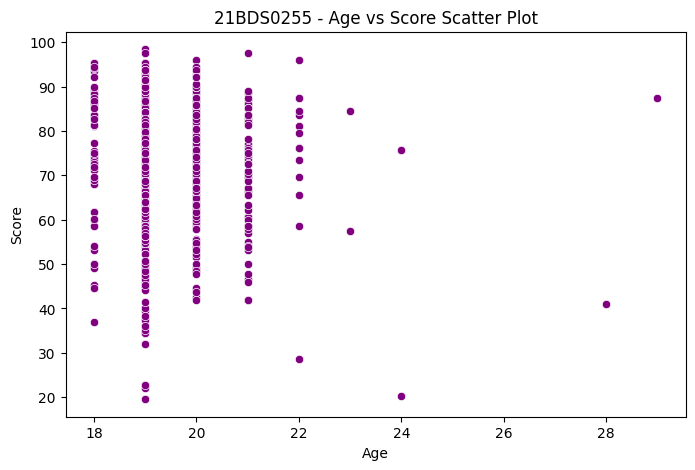

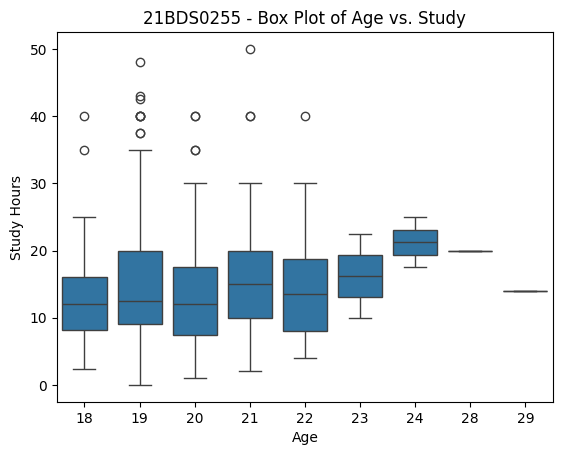

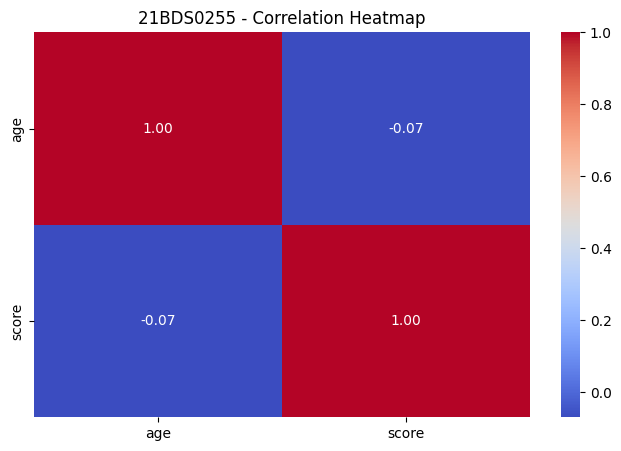

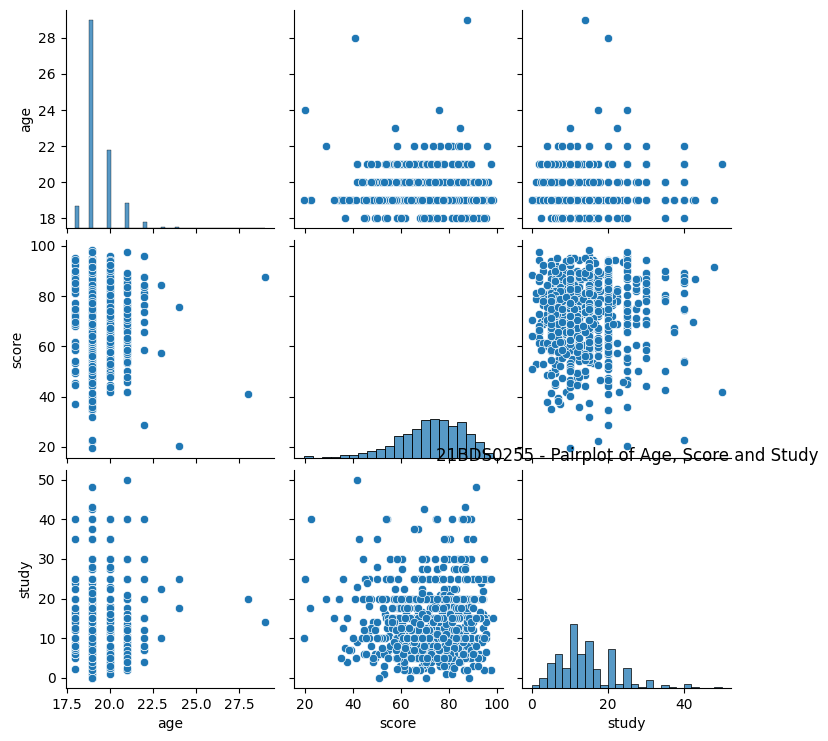

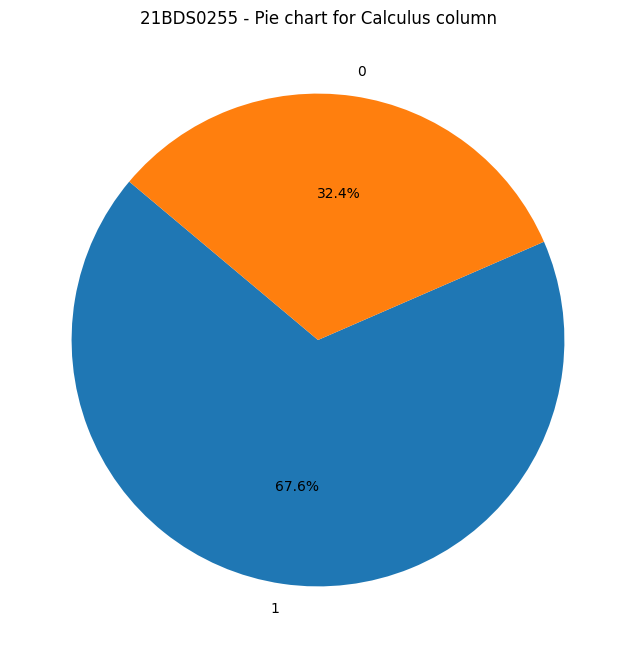

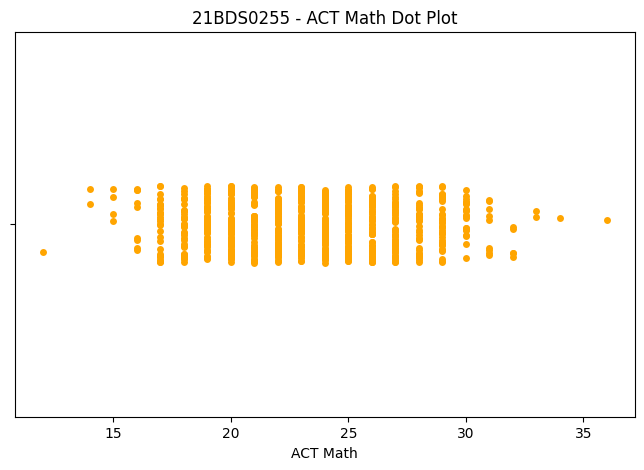

p-value:	 0.04391988313262509
cor:		 -0.06888515591191442
          rownames       age      work     study    econhs    colgpa  \
rownames  1.000000 -0.266477 -0.125924 -0.049974  0.027897  0.083476   
age      -0.266477  1.000000  0.209845  0.050424 -0.012592 -0.105017   
work     -0.125924  0.209845  1.000000 -0.007908  0.037034 -0.124766   
study    -0.049974  0.050424 -0.007908  1.000000 -0.014020  0.068338   
econhs    0.027897 -0.012592  0.037034 -0.014020  1.000000 -0.029492   
colgpa    0.083476 -0.105017 -0.124766  0.068338 -0.029492  1.000000   
hsgpa     0.038751 -0.031455  0.018489  0.073067  0.063533  0.479219   
acteng    0.042661 -0.028552  0.033627 -0.083931 -0.061377  0.280810   
actmth    0.074283 -0.022603 -0.000019 -0.101565 -0.058610  0.300045   
act       0.057236 -0.019895  0.023738 -0.140150 -0.065619  0.332151   
mathscr   0.073288 -0.022709 -0.026244 -0.016485 -0.020095  0.191712   
male     -0.025056  0.057390 -0.133186 -0.145761  0.036288 -0.072758   
calcul

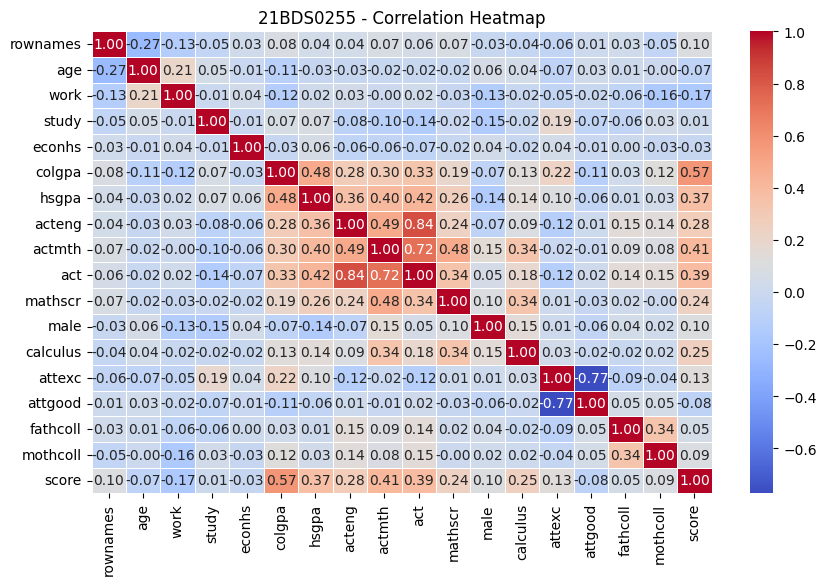

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/econmath.csv"
data = pd.read_csv(url)

# Create a copy of the original dataset
data_cleaned = data.copy()

# Explore the dataset
print("Dataset Shape:", data.shape)   # Number of rows and columns
print("\nColumn Names:\n", data.columns)  # Column names
print("\nDataset Info:")
print(data.info())  # Structure of dataset
print("\nSummary Statistics:\n", data.describe())  # Summary statistics

# View first and last 3 rows
print("\nFirst 3 Rows:\n", data.head(3))
print("\nLast 3 Rows:\n", data.tail(3))

# Checking missing values
print("\nAre there any missing values? ", data.isnull().values.any())
print("\nMissing Values Per Column:\n", data.isnull().sum())

# Visualizing missing values
msno.bar(data)  # Bar chart of missing values
plt.title("21BDS0255 - Missing Values Count per Column")
plt.show()

# Check if the values in the 'score' column are numeric
non_numeric_counts = data['score'].astype(str).str.isnumeric().value_counts()

print("Numeric and Non-Numeric Value Counts in 'score' Column:\n", non_numeric_counts)

# Data Cleaning - Handling Missing Values
data_cleaned["acteng"] = pd.to_numeric(data_cleaned["acteng"], errors="coerce")
data_cleaned["actmth"] = pd.to_numeric(data_cleaned["actmth"], errors="coerce")
data_cleaned["act"] = pd.to_numeric(data_cleaned["act"], errors="coerce")

# Fill missing values with column mean
data_cleaned["acteng"].fillna(data_cleaned["acteng"].mean(), inplace=True)
data_cleaned["actmth"].fillna(data_cleaned["actmth"].mean(), inplace=True)
data_cleaned["act"].fillna(data_cleaned["act"].mean(), inplace=True)

# Dropping unnecessary columns (econhs, act)
data_cleaned = data.drop(columns=["econhs", "act"], errors="ignore")

# After Data Cleaning - Visualization
msno.bar(data_cleaned)  # Bar chart of missing values
plt.title("21BDS0255 - Missing Values Count per Column")
plt.show()

# Statistical Analysis
print("\nMean of study column:", data_cleaned["study"].mean())
print("Median of study column:", data_cleaned["study"].median())
print("Mode of study column:", data_cleaned["study"].mode()[0])
print("Standard Deviation of study column:", data_cleaned["study"].std())
print("Variance of study column:", data_cleaned["study"].var())
print("Quantiles of study column:\n", data_cleaned["study"].quantile([0.25, 0.5, 0.75]))
print("Interquartile Range (IQR) of study column:", stats.iqr(data_cleaned["study"]))

# Compute Correlation between age and score
correlation = data_cleaned[["age", "score"]].corr()
print("\nCorrelation between age and score:\n", correlation)

# Visualization
# Univariate Analysis - Distribution plots
plt.figure(figsize=(10,5))
sns.histplot(data_cleaned["study"], bins=10, kde=True, color="blue")
plt.title("21BDS0255 - Study Hours Distribution")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(y=data_cleaned["score"], color="green")
plt.title("21BDS0255 - Boxplot of Scores")
plt.ylabel("Score")
plt.show()

# Bivariate Analysis - Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_cleaned["age"], y=data_cleaned["score"], color="purple")
plt.title("21BDS0255 - Age vs Score Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()

sns.boxplot(x="age", y="study", data=data)
plt.xlabel("Age")
plt.ylabel("Study Hours")
plt.title("21BDS0255 - Box Plot of Age vs. Study")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("21BDS0255 - Correlation Heatmap")
plt.show()

# Multivariate Analysis - Pairplot
sns.pairplot(data_cleaned[["age", "score", "study"]])
plt.title("21BDS0255 - Pairplot of Age, Score and Study")
plt.show()

# Additional
calculus_counts = data_cleaned['calculus'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(calculus_counts, labels=calculus_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("21BDS0255 - Pie chart for Calculus column")
plt.show()

# Dot Plot for actmth
plt.figure(figsize=(8,5))
sns.stripplot(x=data_cleaned["actmth"], jitter=True, color="orange", size=5)
plt.title("21BDS0255 - ACT Math Dot Plot")
plt.xlabel("ACT Math")
plt.show()

# Calculate Pearson correlation for score and age
corr = stats.pearsonr(data["score"], data["age"])

# Print correlation coefficient and p-value
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Display correlation matrix
print(correlation_matrix)

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("21BDS0255 - Correlation Heatmap")

# Show plot
plt.show()


Dataset Shape: (856, 18)

Column Names:
 Index(['rownames', 'age', 'work', 'study', 'econhs', 'colgpa', 'hsgpa',
       'acteng', 'actmth', 'act', 'mathscr', 'male', 'calculus', 'attexc',
       'attgood', 'fathcoll', 'mothcoll', 'score'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  856 non-null    int64  
 1   age       856 non-null    int64  
 2   work      856 non-null    float64
 3   study     856 non-null    float64
 4   econhs    856 non-null    int64  
 5   colgpa    856 non-null    float64
 6   hsgpa     856 non-null    float64
 7   acteng    814 non-null    float64
 8   actmth    814 non-null    float64
 9   act       814 non-null    float64
 10  mathscr   856 non-null    int64  
 11  male      856 non-null    int64  
 12  calculus  856 non-null    int64  
 13  attexc    856 non-null    in

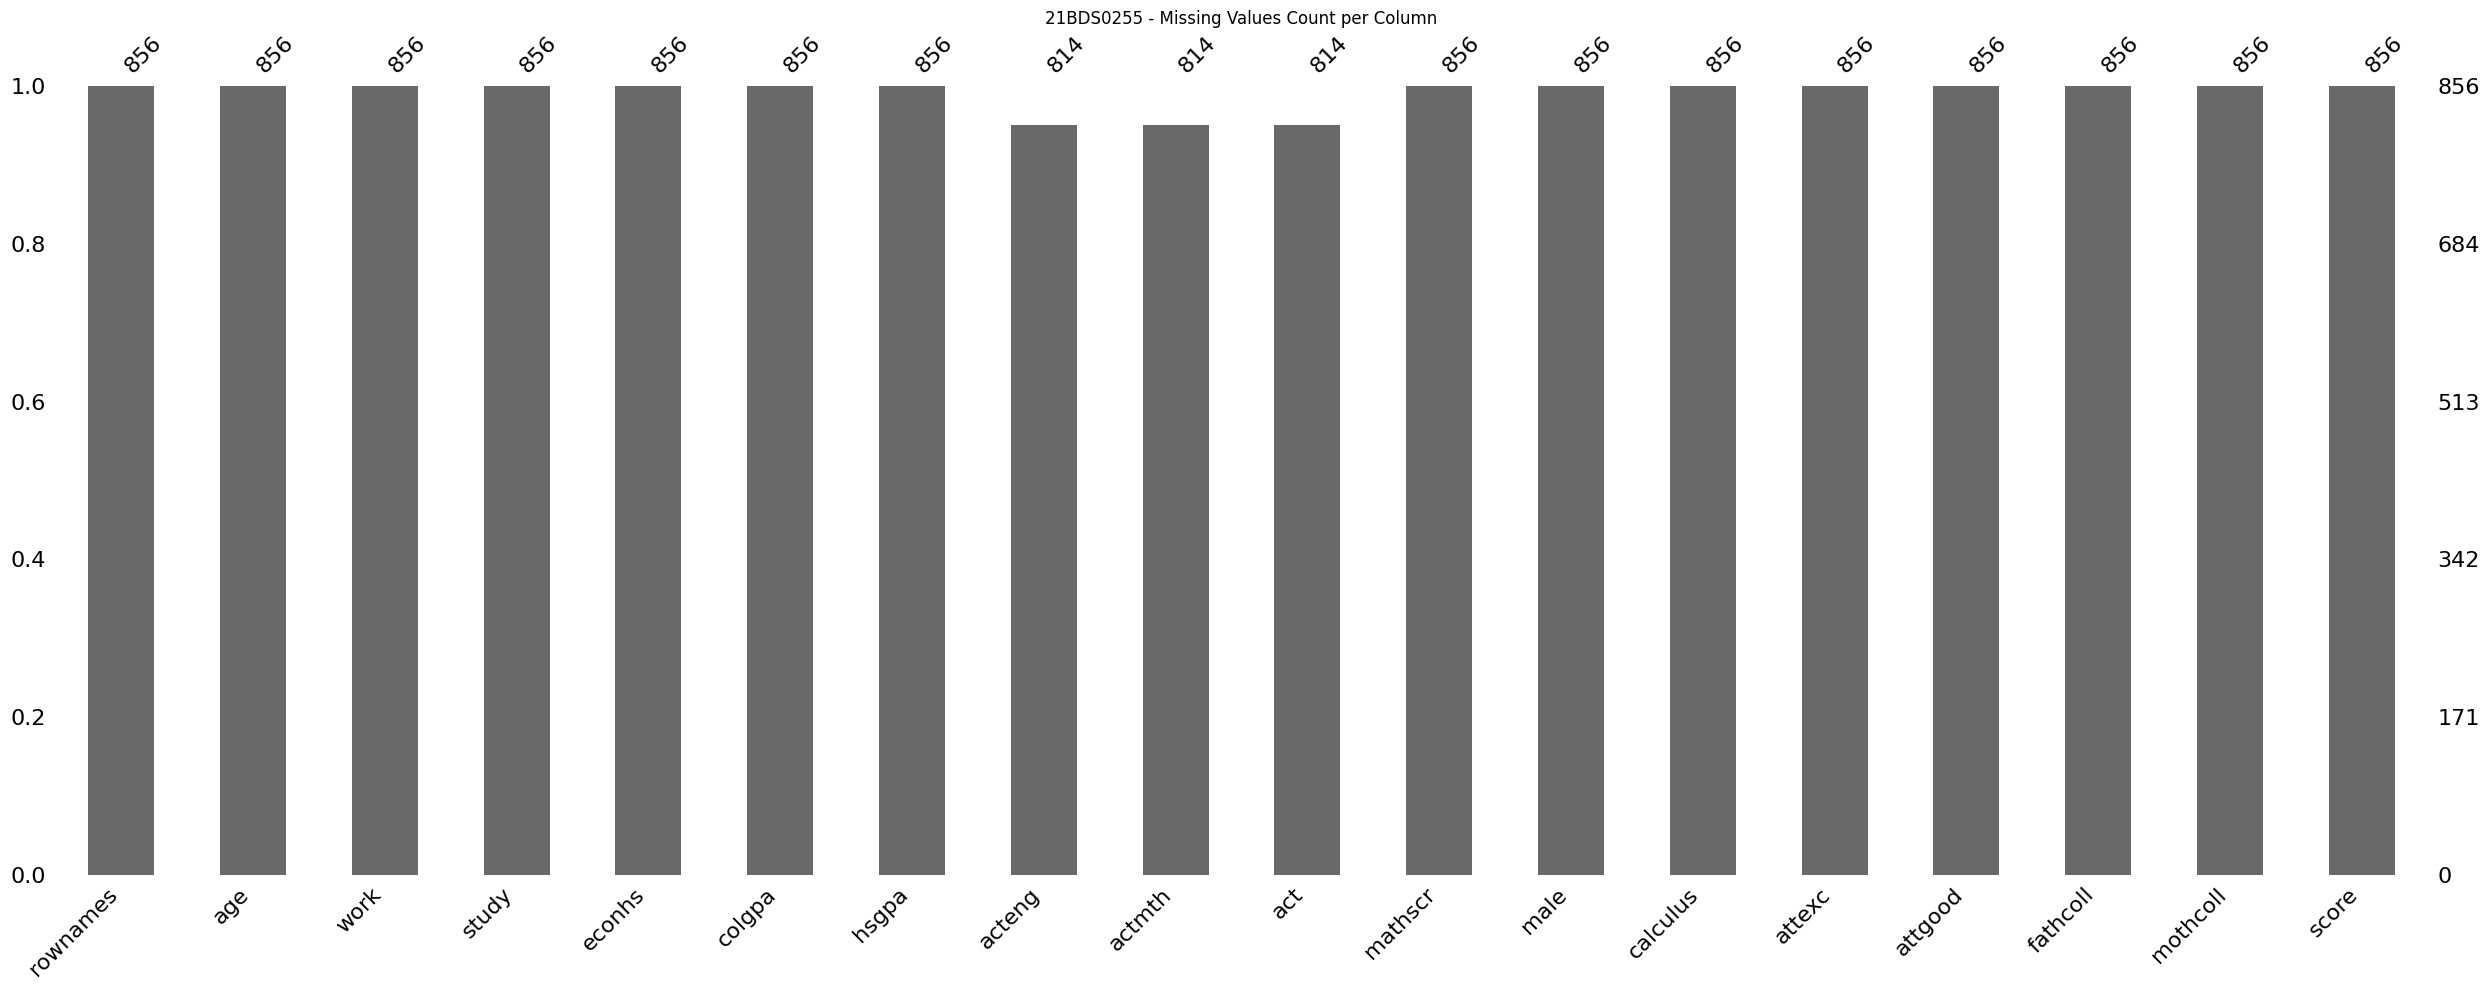

Numeric and Non-Numeric Value Counts in 'score' Column:
 score
False    856
Name: count, dtype: int64


<ipython-input-16-20f6f00d8355>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned["acteng"].fillna(data_cleaned["acteng"].mean(), inplace=True)
<ipython-input-16-20f6f00d8355>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

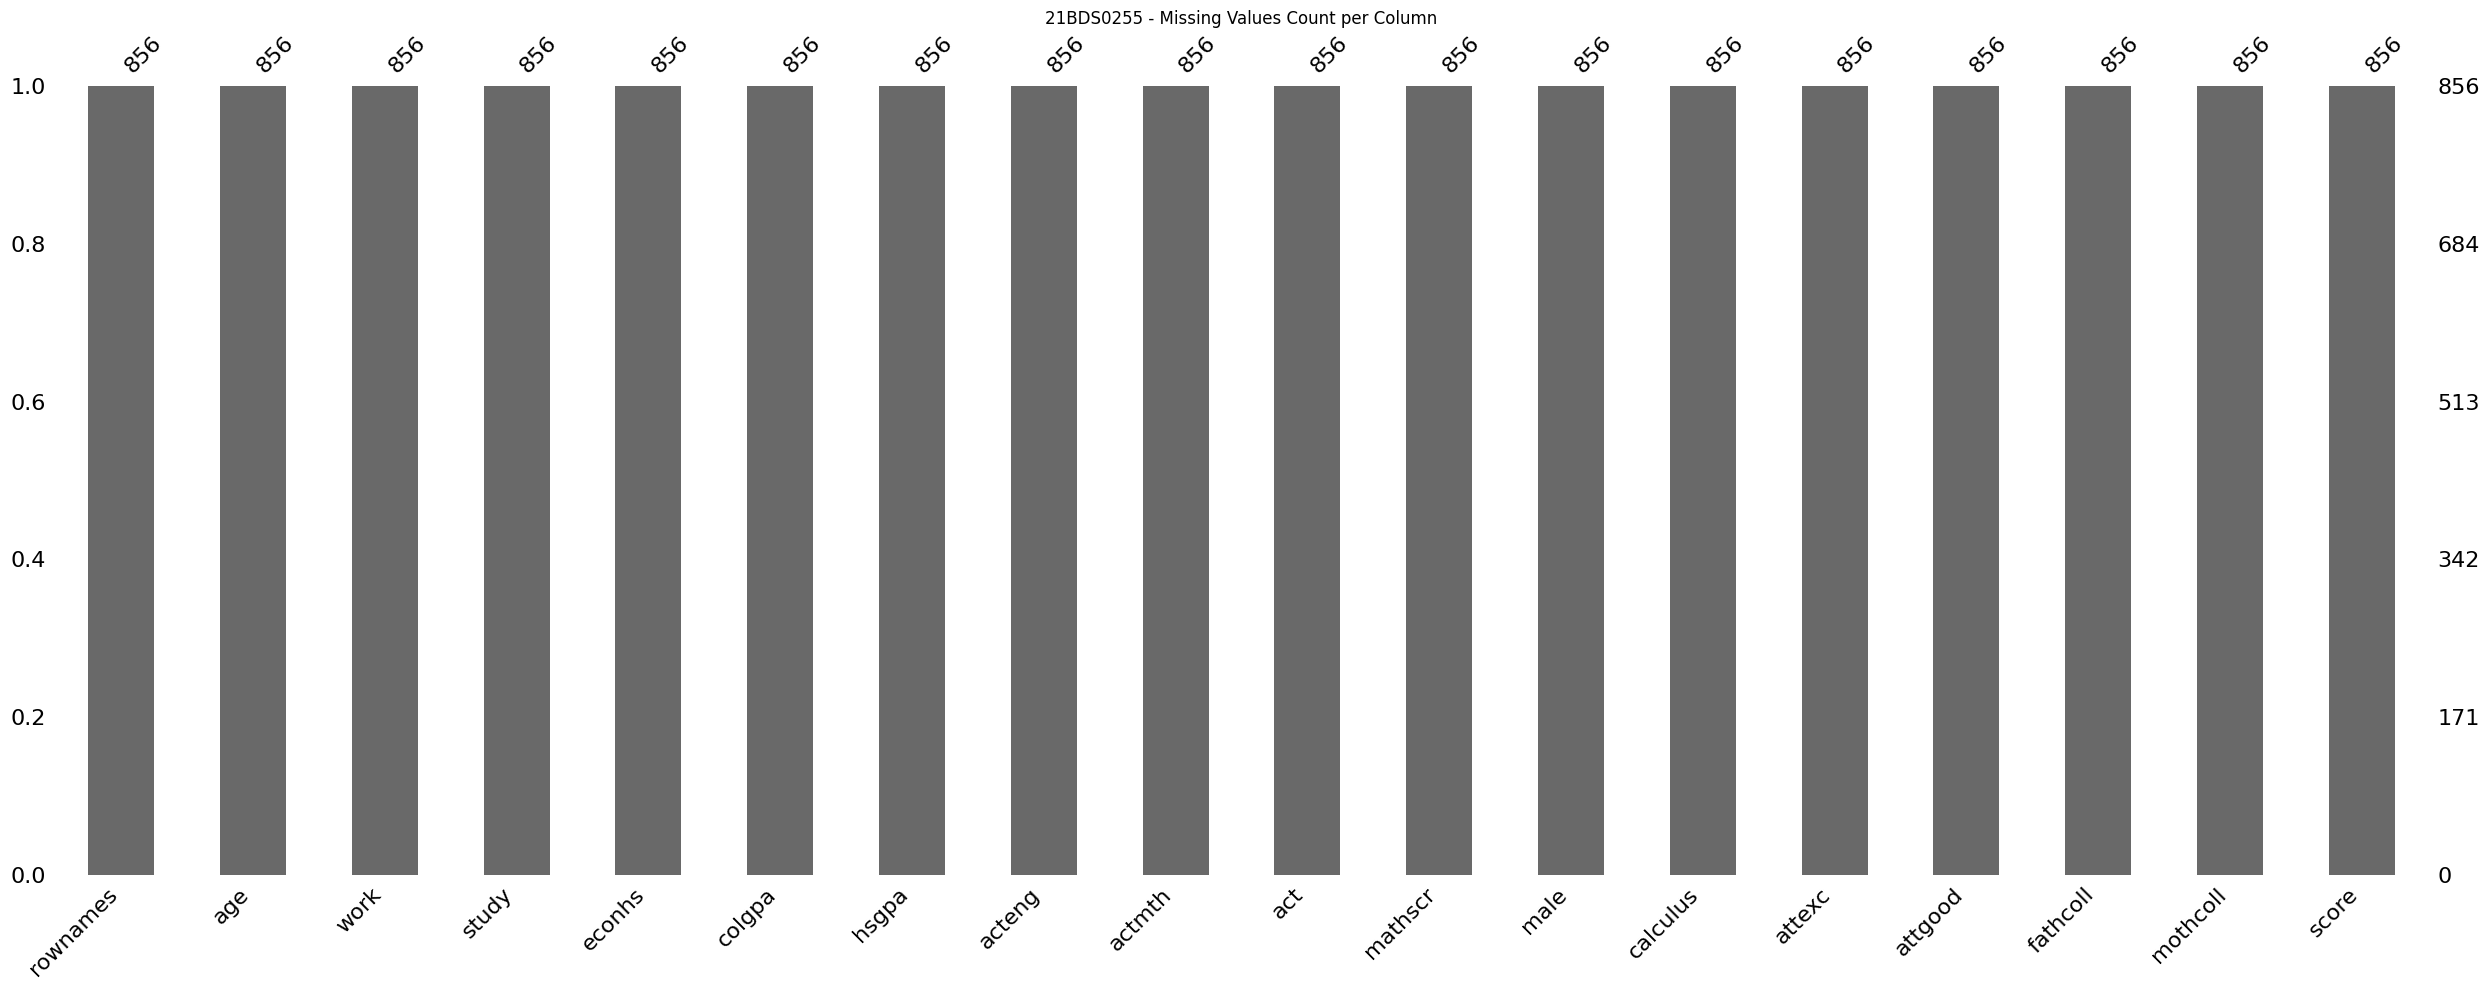


Mean of study column: 13.917990654205607
Median of study column: 12.0
Mode of study column: 10.0
Standard Deviation of study column: 7.804398440759843
Variance of study column: 60.90863502213467
Quantiles of study column:
 0.25     8.5
0.50    12.0
0.75    18.0
Name: study, dtype: float64
Interquartile Range (IQR) of study column: 9.5

Correlation between age and score:
             age     score
age    1.000000 -0.068885
score -0.068885  1.000000


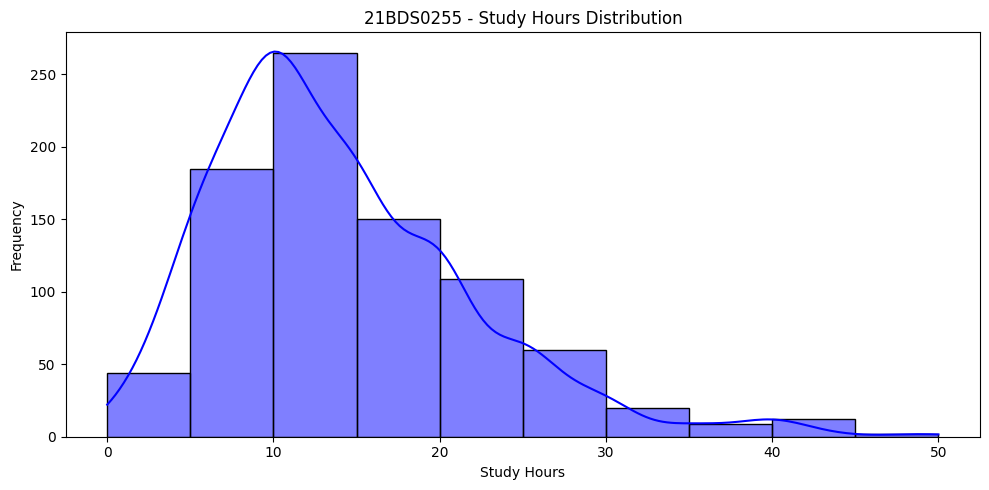

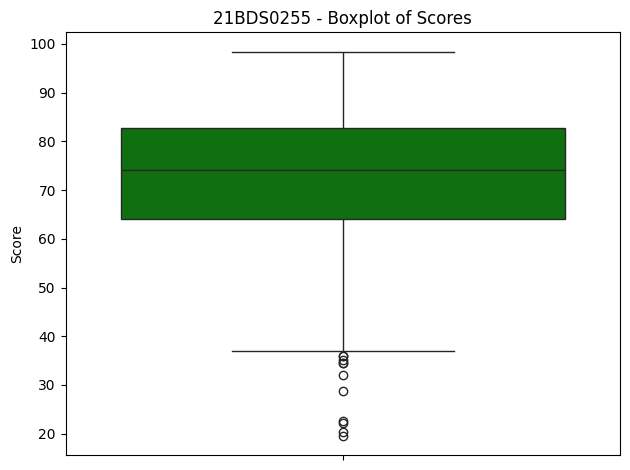

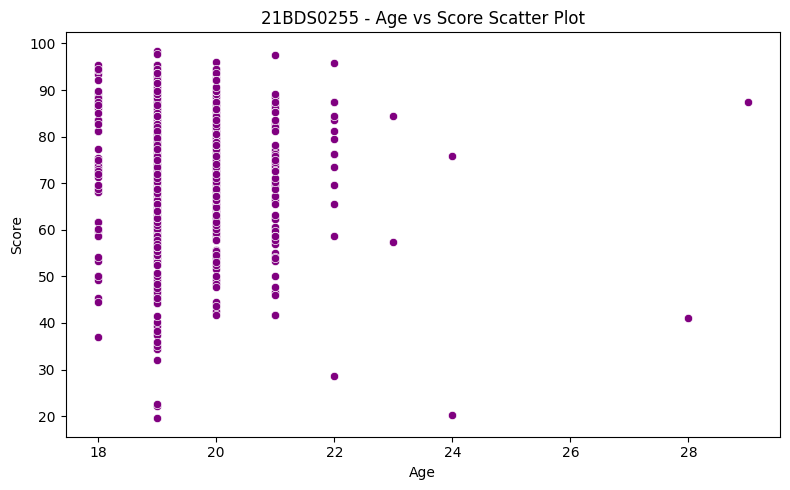

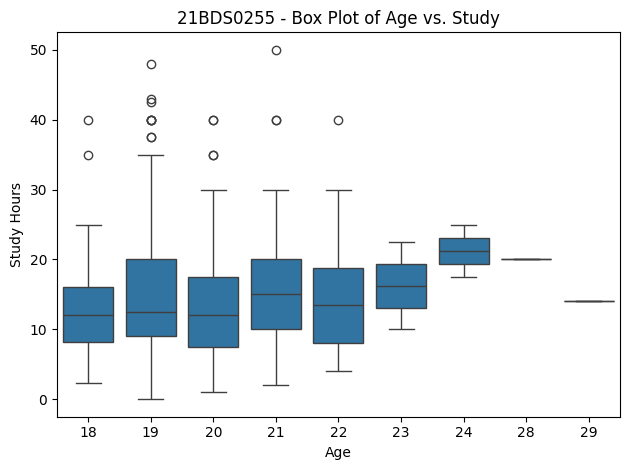

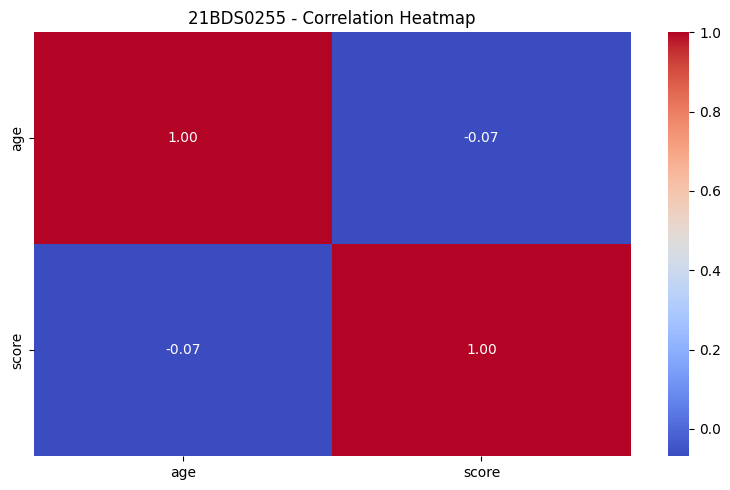

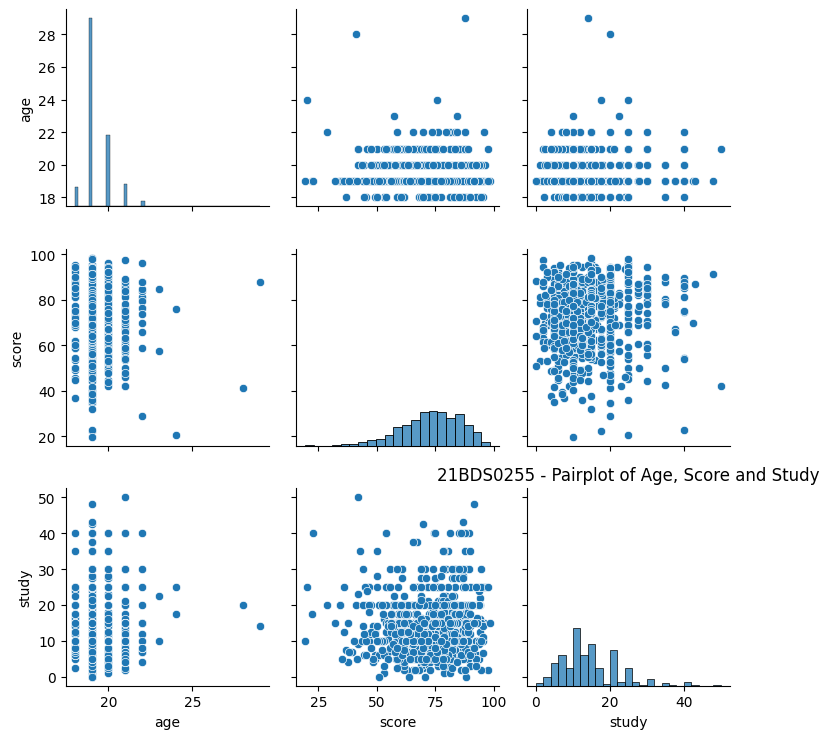

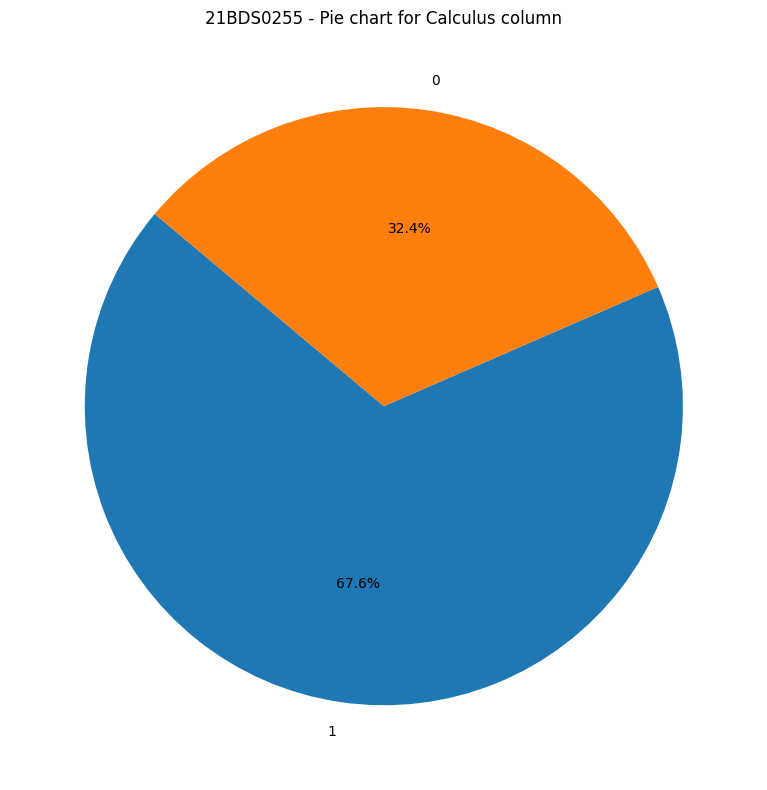

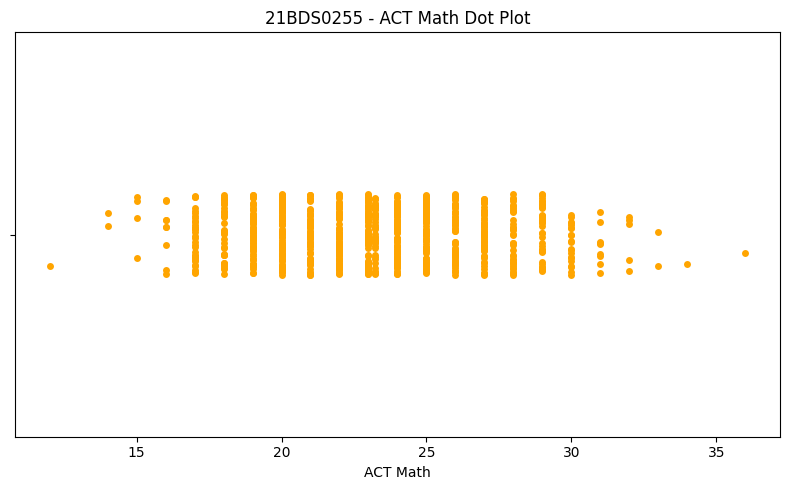

p-value:	 0.04391988313262509
cor:		 -0.06888515591191442
          rownames       age      work     study    econhs    colgpa  \
rownames  1.000000 -0.266477 -0.125924 -0.049974  0.027897  0.083476   
age      -0.266477  1.000000  0.209845  0.050424 -0.012592 -0.105017   
work     -0.125924  0.209845  1.000000 -0.007908  0.037034 -0.124766   
study    -0.049974  0.050424 -0.007908  1.000000 -0.014020  0.068338   
econhs    0.027897 -0.012592  0.037034 -0.014020  1.000000 -0.029492   
colgpa    0.083476 -0.105017 -0.124766  0.068338 -0.029492  1.000000   
hsgpa     0.038751 -0.031455  0.018489  0.073067  0.063533  0.479219   
acteng    0.042661 -0.028552  0.033627 -0.083931 -0.061377  0.280810   
actmth    0.074283 -0.022603 -0.000019 -0.101565 -0.058610  0.300045   
act       0.057236 -0.019895  0.023738 -0.140150 -0.065619  0.332151   
mathscr   0.073288 -0.022709 -0.026244 -0.016485 -0.020095  0.191712   
male     -0.025056  0.057390 -0.133186 -0.145761  0.036288 -0.072758   
calcul

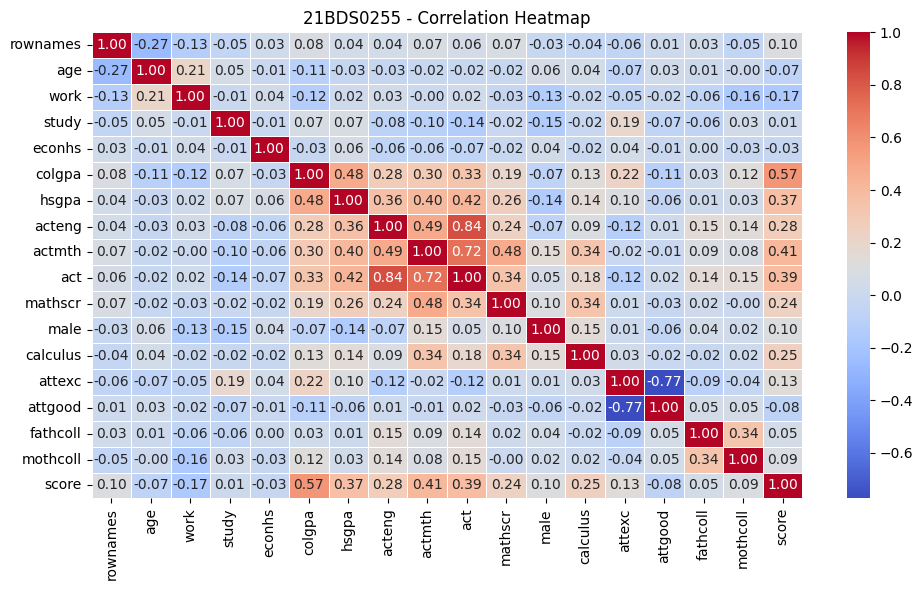

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/econmath.csv"
data = pd.read_csv(url)

# Create a copy of the original dataset
data_cleaned = data.copy()

# Explore the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nDataset Info:")
print(data.info())  # Structure of dataset
print("\nSummary Statistics:\n", data.describe())

# View first and last 3 rows
print("\nFirst 3 Rows:\n", data.head(3))
print("\nLast 3 Rows:\n", data.tail(3))

# Checking missing values
print("\nAre there any missing values? ", data.isnull().values.any())
print("\nMissing Values Per Column:\n", data.isnull().sum())

# Visualizing missing values
msno.bar(data)  # Bar chart of missing values
plt.title("21BDS0255 - Missing Values Count per Column")
plt.tight_layout()
plt.show()

# Check if the values in the 'score' column are numeric
non_numeric_counts = data['score'].astype(str).str.isnumeric().value_counts()

print("Numeric and Non-Numeric Value Counts in 'score' Column:\n", non_numeric_counts)

# Data Cleaning - Handling Missing Values
data_cleaned["acteng"] = pd.to_numeric(data_cleaned["acteng"])
data_cleaned["actmth"] = pd.to_numeric(data_cleaned["actmth"])
data_cleaned["act"] = pd.to_numeric(data_cleaned["act"])

# Fill missing values with column mean
data_cleaned["acteng"].fillna(data_cleaned["acteng"].mean(), inplace=True)
data_cleaned["actmth"].fillna(data_cleaned["actmth"].mean(), inplace=True)
data_cleaned["act"].fillna(data_cleaned["act"].mean(), inplace=True)

# Dropping unnecessary columns (econhs, act)
data_cleaned1 = data_cleaned.drop(columns=["econhs", "attexc"], errors="ignore")

# After Data Cleaning - Visualization

msno.bar(data_cleaned)
plt.title("21BDS0255 - Missing Values Count per Column")
plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nMean of study column:", data_cleaned["study"].mean())
print("Median of study column:", data_cleaned["study"].median())
print("Mode of study column:", data_cleaned["study"].mode()[0])
print("Standard Deviation of study column:", data_cleaned["study"].std())
print("Variance of study column:", data_cleaned["study"].var())
print("Quantiles of study column:\n", data_cleaned["study"].quantile([0.25, 0.5, 0.75]))
print("Interquartile Range (IQR) of study column:", stats.iqr(data_cleaned["study"]))

# Compute Correlation between age and score
correlation = data_cleaned[["age", "score"]].corr()
print("\nCorrelation between age and score:\n", correlation)

# Visualization
# Univariate Analysis - Distribution plots
plt.figure(figsize=(10,5))
sns.histplot(data_cleaned["study"], bins=10, kde=True, color="blue")
plt.title("21BDS0255 - Study Hours Distribution")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

sns.boxplot(y=data_cleaned["score"], color="green")
plt.title("21BDS0255 - Boxplot of Scores")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# Bivariate Analysis - Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_cleaned["age"], y=data_cleaned["score"], color="purple")
plt.title("21BDS0255 - Age vs Score Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

sns.boxplot(x="age", y="study", data=data)
plt.xlabel("Age")
plt.ylabel("Study Hours")
plt.title("21BDS0255 - Box Plot of Age vs. Study")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("21BDS0255 - Correlation Heatmap")
plt.tight_layout()
plt.show()

# Multivariate Analysis - Pairplot
sns.pairplot(data_cleaned[["age", "score", "study"]])
plt.title("21BDS0255 - Pairplot of Age, Score and Study")
plt.tight_layout()
plt.show()

# Additional
calculus_counts = data_cleaned['calculus'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(calculus_counts, labels=calculus_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("21BDS0255 - Pie chart for Calculus column")
plt.tight_layout()
plt.show()

# Dot Plot for actmth
plt.figure(figsize=(8,5))
sns.stripplot(x=data_cleaned["actmth"], jitter=True, color="orange", size=5)
plt.title("21BDS0255 - ACT Math Dot Plot")
plt.xlabel("ACT Math")
plt.tight_layout()
plt.show()

# Calculate Pearson correlation for score and age
corr = stats.pearsonr(data["score"], data["age"])

# Print correlation coefficient and p-value
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Display correlation matrix
print(correlation_matrix)

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("21BDS0255 - Correlation Heatmap")

# Show plot
plt.tight_layout()
plt.show()
